<a href="https://colab.research.google.com/github/JYates5597017/JYates5597017-DataScience-GenAI-Submissions/blob/main/SomeSeminar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First we ask gemini "please create a dataframe from loan_data.csv and display it to me"

In [4]:
import pandas as pd

# Load the CSV file into a DataFrame
df_loan = pd.read_csv('loan_data.csv')

# Display the first 5 rows of the DataFrame
display(df_loan.head())

age  years_employed  annual_income  credit_score  credit_history_years  \
0   40            17.2          25579           692                   5.3   
1   33             7.3          43087           627                   3.5   
2   42             1.1          20840           689                   8.4   
3   53             0.5          29147           692                   9.8   
4   32            12.5          63657           630                   7.2   

   savings_assets  current_debt  defaults_on_file  delinquencies_last_2yrs  \
0             895         10820                 0                        0   
1             169         16550                 0                        1   
2              17          7852                 0                        0   
3            1480         11603                 0                        1   
4             209         12424                 0                        0   

   derogatory_marks  loan_amount  interest_rate  debt_to_income_ratio  \
0                 0          600          17.02                 0.423   
1                 0        53300          14.10                 0.384   
2                 0         2100          18.33                 0.377   
3                 0         2900          18.74                 0.398   
4                 0        99600          13.92                 0.195   

   loan_to_income_ratio  payment_to_income_ratio  loan_status  
0                 0.023                    0.008            1  
1                 1.237                    0.412            0  
2                 0.101                    0.034            1  
3                 0.099                    0.033            1  
4                 1.565                    0.522            1

nice, now lets check for null values with "now check for null fields and missing values"

In [5]:
import pandas as pd

# Check for null values in each column
null_values_count = df_loan.isnull().sum()

# Display the count of null values
display(null_values_count)

age                        0
years_employed             0
annual_income              0
credit_score               0
credit_history_years       0
savings_assets             0
current_debt               0
defaults_on_file           0
delinquencies_last_2yrs    0
derogatory_marks           0
loan_amount                0
interest_rate              0
debt_to_income_ratio       0
loan_to_income_ratio       0
payment_to_income_ratio    0
loan_status                0
dtype: int64

no nulls, thats good, so lets make a regression, perhapd with annual income and credit score. "Scatter plot annual_income against credit_score and plot the regression line in red"

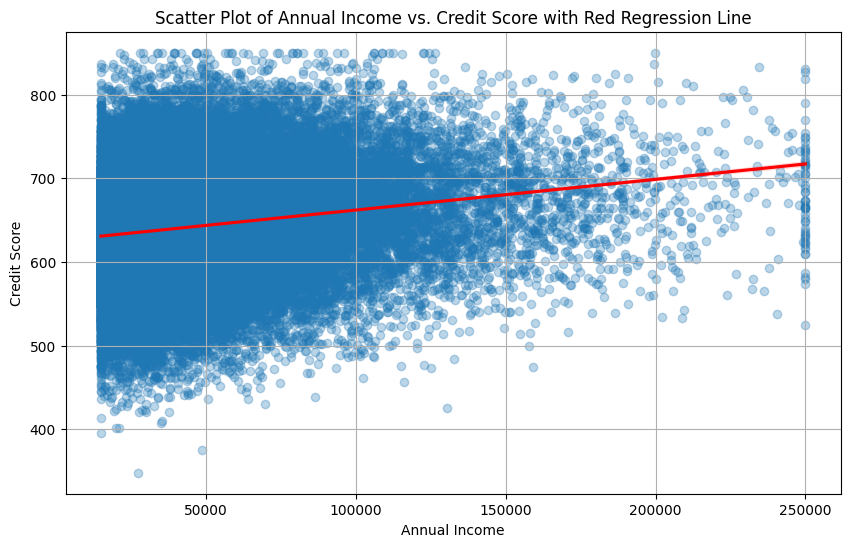

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with a regression line in red
plt.figure(figsize=(10, 6))
sns.regplot(x='annual_income', y='credit_score', data=df_loan, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Scatter Plot of Annual Income vs. Credit Score with Red Regression Line')
plt.xlabel('Annual Income')
plt.ylabel('Credit Score')
plt.grid(True)
plt.show()

a pretty weak correlation, oh well.

Lets do a pairplot to save time. "pairplot the fields years_employed	annual_income	credit_score	credit_history_years"

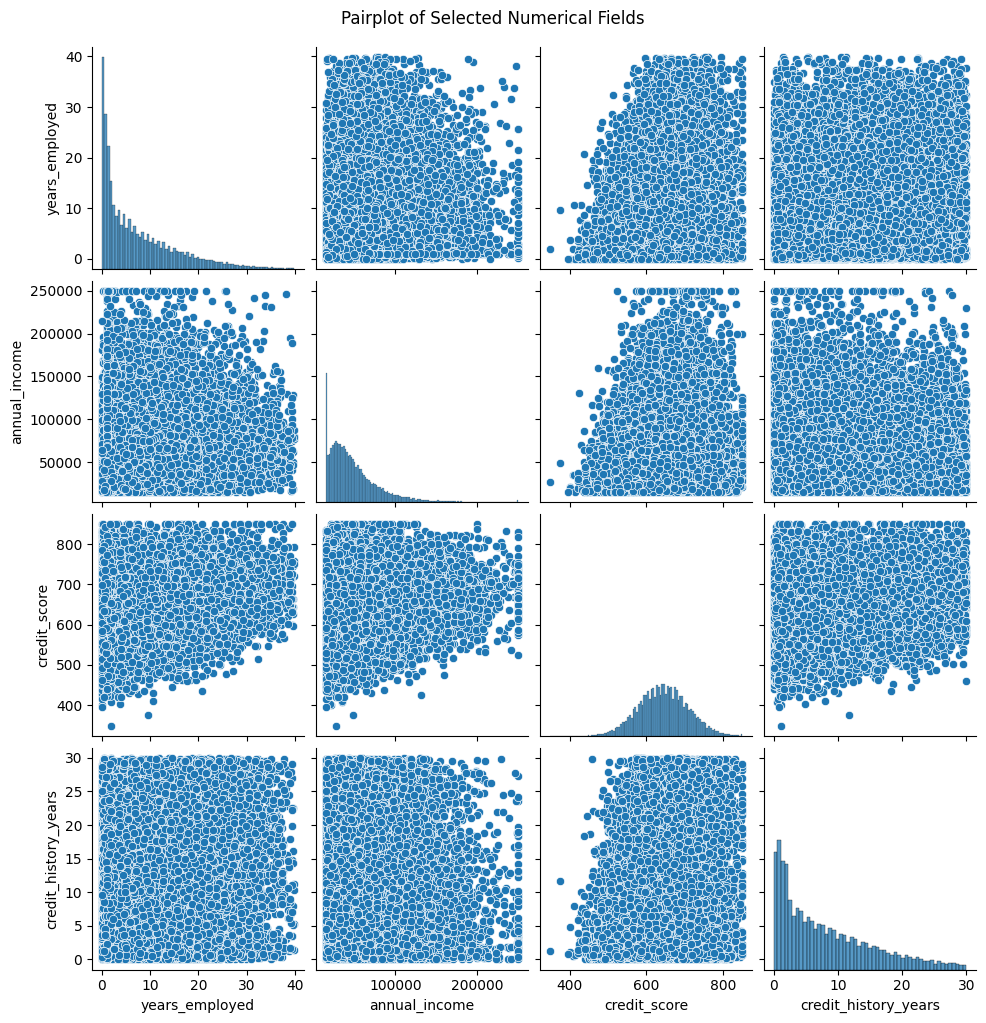

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the specified numerical columns for the pairplot
selected_columns = ['years_employed', 'annual_income', 'credit_score', 'credit_history_years']
df_selected = df_loan[selected_columns]

# Create a pairplot of the selected numerical fields
sns.pairplot(df_selected)
plt.suptitle('Pairplot of Selected Numerical Fields', y=1.02) # Adjust suptitle position
plt.show()

this doesnt seem to be goign anywhere, lets try "scatterplot credit score against annual_income, with points colour coded conditional on the defaults on file"

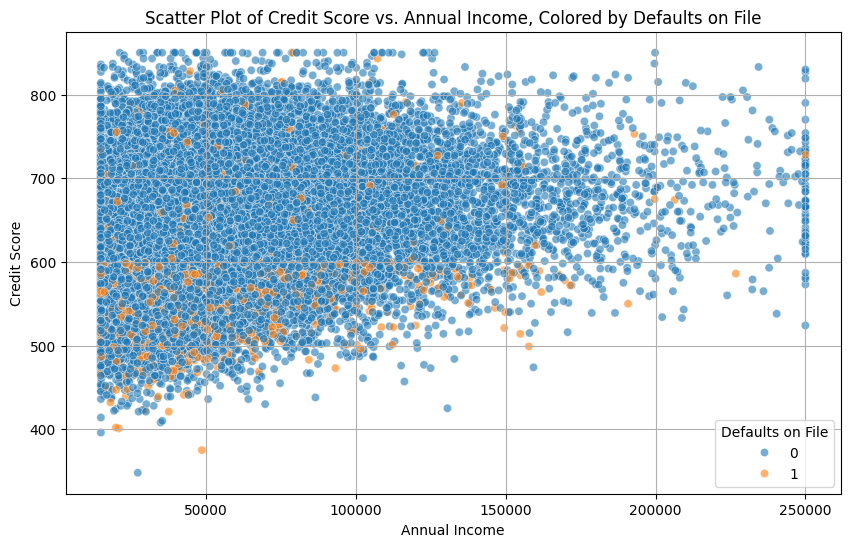

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with points color-coded by 'defaults_on_file'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_income', y='credit_score', hue='defaults_on_file', data=df_loan, alpha=0.6)
plt.title('Scatter Plot of Credit Score vs. Annual Income, Colored by Defaults on File')
plt.xlabel('Annual Income')
plt.ylabel('Credit Score')
plt.grid(True)
plt.legend(title='Defaults on File')
plt.show()

now lets try "now use decision trees of depths 1,4,10 to create decision boundries on this data"

this prompt is too complex, it did the thing where it has to break it down

# Task
Prepare the data by selecting 'annual_income' and 'credit_score' as features (X) and 'defaults_on_file' as the target variable (y) from the `df_loan` DataFrame. Then, for each specified depth (1, 4, and 10), train a Decision Tree Classifier, create a meshgrid for plotting, predict classes on the meshgrid to define decision boundaries, plot these boundaries using contour plots, and overlay a scatter plot of the original data points (colored by 'defaults_on_file' status). Ensure each plot has appropriate titles, labels, and a legend. Finally, summarize the insights gained from visualizing the decision boundaries at different tree depths, explaining the effect of depth on model complexity and boundary shape.

## Prepare Data for Decision Trees

### Subtask:
Select 'annual_income' and 'credit_score' as features (X) and 'defaults_on_file' as the target variable (y) from the `df_loan` DataFrame. Convert the target variable to numerical format if necessary for classification.


**Reasoning**:
Select the specified features and target variable from `df_loan` and ensure the target variable is in numerical format for classification.



In [11]:
import pandas as pd

# 1. Create a DataFrame X containing the 'annual_income' and 'credit_score' columns from df_loan.
X = df_loan[['annual_income', 'credit_score']]

# 2. Create a Series y containing the 'defaults_on_file' column from df_loan.
y = df_loan['defaults_on_file']

# 3. Verify that the 'defaults_on_file' column in y is in a numerical format suitable for classification (e.g., 0 and 1).
# From the kernel state, 'defaults_on_file' appears to be already in numerical (integer) format (0 or 1).
# We can explicitly convert it to int if there's any doubt, though it's likely already correct.
y = y.astype(int)

print("Features (X) head:\n", X.head())
print("\nTarget (y) head:\n", y.head())
print("\nData type of target (y):", y.dtype)

Features (X) head:
    annual_income  credit_score
0          25579           692
1          43087           627
2          20840           689
3          29147           692
4          63657           630

Target (y) head:
 0    0
1    0
2    0
3    0
4    0
Name: defaults_on_file, dtype: int64

Data type of target (y): int64


## Train and Visualize Decision Trees

### Subtask:
For each specified depth (1, 4, and 10), train a Decision Tree Classifier, create a meshgrid for plotting, predict classes on the meshgrid to define decision boundaries, plot these boundaries using contour plots, and overlay a scatter plot of the original data points (colored by 'defaults_on_file' status). Ensure each plot has appropriate titles, labels, and a legend.


**Reasoning**:
The subtask requires training Decision Tree Classifiers for various depths and visualizing their decision boundaries. This involves importing necessary libraries, iterating through specified depths, training the models, creating a meshgrid, predicting classes, and then plotting the decision boundaries with the original data points.



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


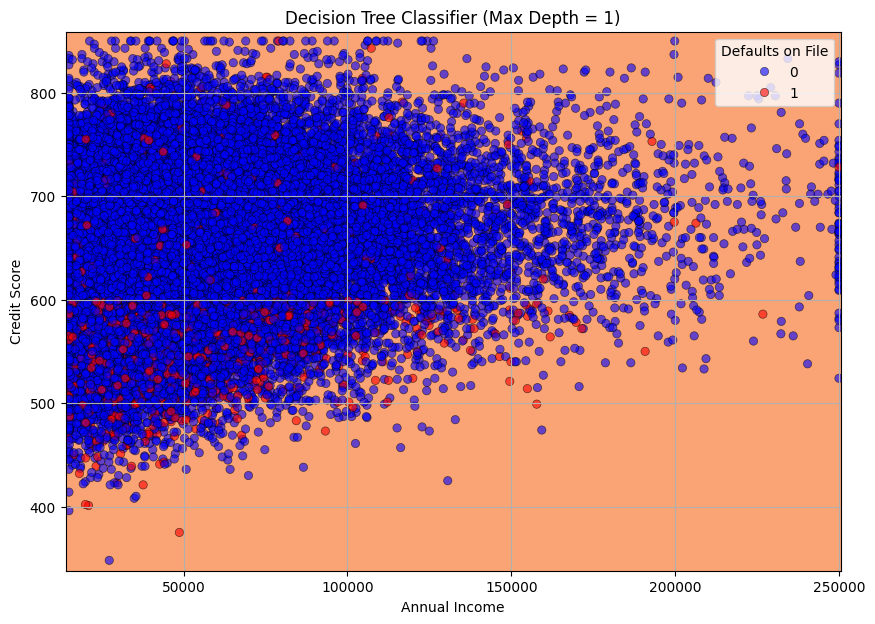

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


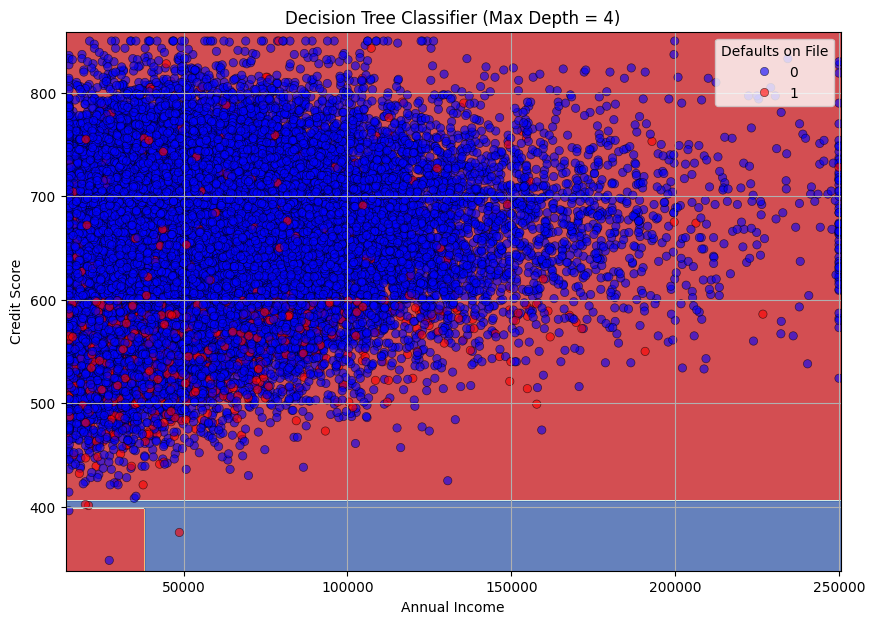

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


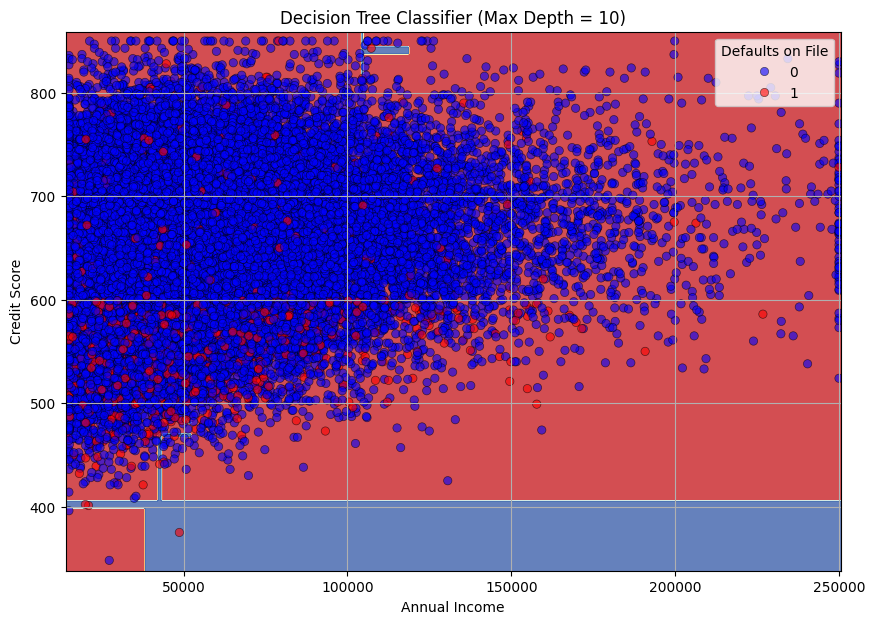

Decision tree models trained and decision boundaries visualized for depths 1, 4, and 10.


In [12]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

# Define the list of tree depths to iterate through
depths = [1, 4, 10]

# Get min and max values for plotting boundaries
x_min, x_max = X['annual_income'].min() - 1000, X['annual_income'].max() + 1000
y_min, y_max = X['credit_score'].min() - 10, X['credit_score'].max() + 10

# Create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 500), np.arange(y_min, y_max, 1))

for depth in depths:
    # Create a DecisionTreeClassifier instance
    tree_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Fit the classifier to the features X and target y
    tree_classifier.fit(X, y)

    # Predict the class for each point on the meshgrid
    Z = tree_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create a new figure and axes for the plot
    plt.figure(figsize=(10, 7))

    # Plot the decision boundaries using contourf
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

    # Overlay a scatter plot of the original data points
    sns.scatterplot(x='annual_income', y='credit_score', hue='defaults_on_file', data=df_loan,
                    palette={0: 'blue', 1: 'red'}, alpha=0.6, edgecolor='k')

    # Add title, labels, and legend
    plt.title(f'Decision Tree Classifier (Max Depth = {depth})')
    plt.xlabel('Annual Income')
    plt.ylabel('Credit Score')
    plt.legend(title='Defaults on File', loc='upper right')
    plt.grid(True)
    plt.show()

print("Decision tree models trained and decision boundaries visualized for depths 1, 4, and 10.")

**Reasoning**:
The previous code produced a `UserWarning` because the input for prediction (`np.c_[xx.ravel(), yy.ravel()]`) did not have feature names, while the model was fitted with a DataFrame `X` that did. To resolve this, I will convert the meshgrid prediction input into a DataFrame with the correct column names before prediction.



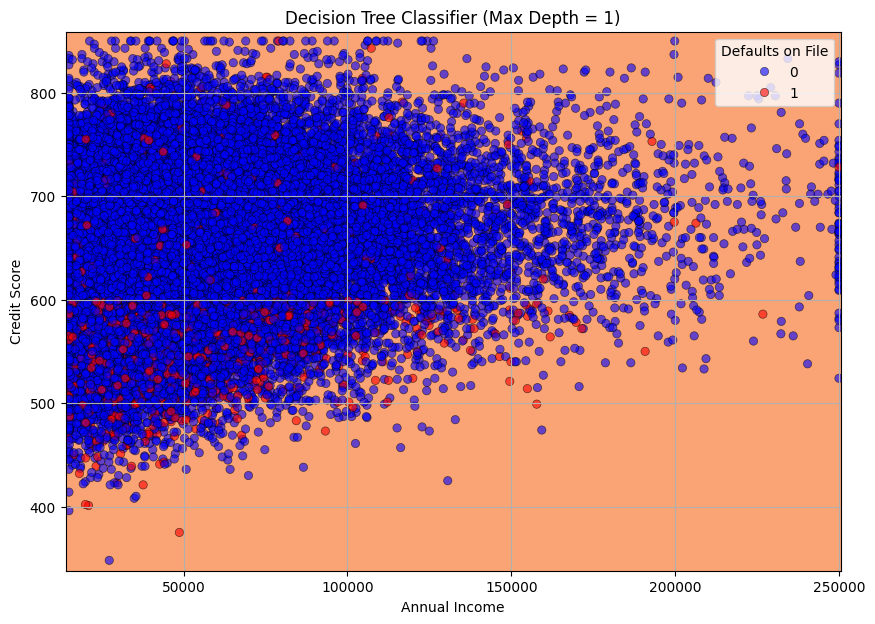

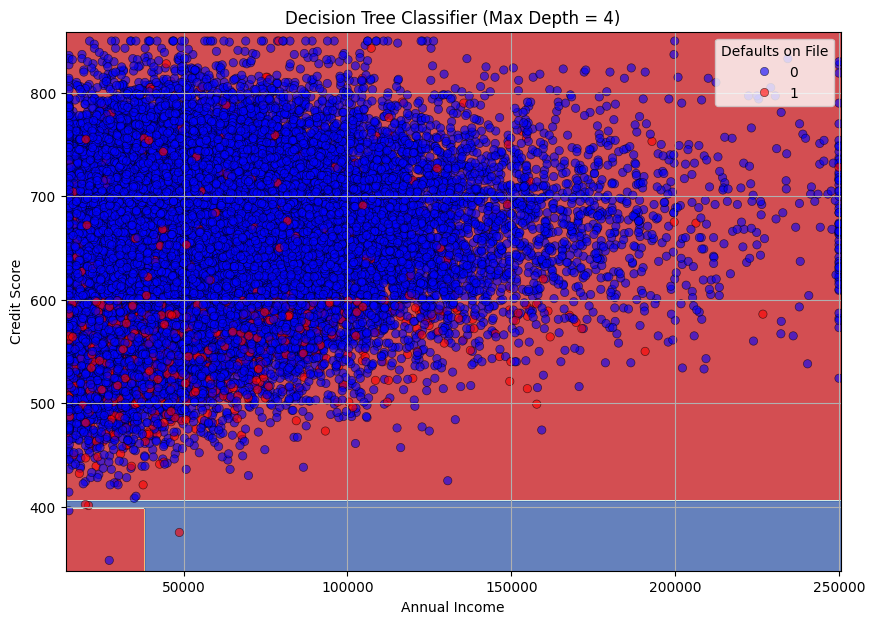

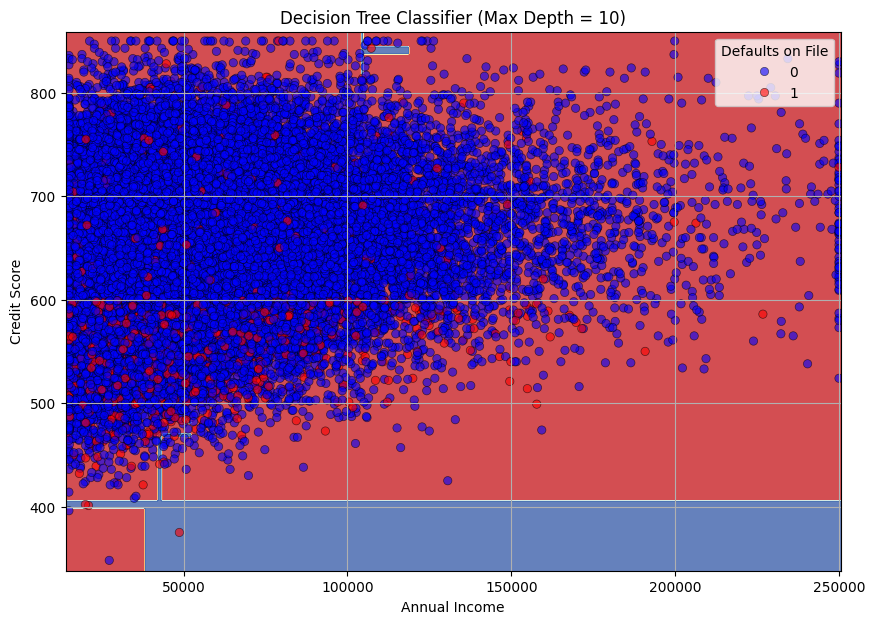

Decision tree models trained and decision boundaries visualized for depths 1, 4, and 10.


In [13]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Import pandas to create DataFrame for prediction
import seaborn as sns # Ensure seaborn is imported for scatterplot, although it was implicitly available from previous cells

# Define the list of tree depths to iterate through
depths = [1, 4, 10]

# Get min and max values for plotting boundaries
x_min, x_max = X['annual_income'].min() - 1000, X['annual_income'].max() + 1000
y_min, y_max = X['credit_score'].min() - 10, X['credit_score'].max() + 10

# Create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 500), np.arange(y_min, y_max, 1))

for depth in depths:
    # Create a DecisionTreeClassifier instance
    tree_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)

    # Fit the classifier to the features X and target y
    tree_classifier.fit(X, y)

    # Prepare meshgrid for prediction with feature names
    meshgrid_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X.columns)

    # Predict the class for each point on the meshgrid
    Z = tree_classifier.predict(meshgrid_df)
    Z = Z.reshape(xx.shape)

    # Create a new figure and axes for the plot
    plt.figure(figsize=(10, 7))

    # Plot the decision boundaries using contourf
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

    # Overlay a scatter plot of the original data points
    sns.scatterplot(x='annual_income', y='credit_score', hue='defaults_on_file', data=df_loan,
                    palette={0: 'blue', 1: 'red'}, alpha=0.6, edgecolor='k')

    # Add title, labels, and legend
    plt.title(f'Decision Tree Classifier (Max Depth = {depth})')
    plt.xlabel('Annual Income')
    plt.ylabel('Credit Score')
    plt.legend(title='Defaults on File', loc='upper right')
    plt.grid(True)
    plt.show()

print("Decision tree models trained and decision boundaries visualized for depths 1, 4, and 10.")

### Summary of Insights from Decision Boundaries at Different Tree Depths

**Depth = 1 (Simple Model):**
- The decision boundary is a single, straight line (either horizontal or vertical). This indicates a very simple model that makes a classification based on a single feature and a single threshold.
- It's highly interpretable but likely underfits the data, meaning it doesn't capture complex relationships between features and the target variable. The boundary might not effectively separate the two classes, leading to high bias.

**Depth = 4 (Moderately Complex Model):**
- The decision boundaries become more complex, forming a series of axis-aligned rectangles. The model can make more nuanced distinctions, partitioning the feature space into several regions.
- This depth often strikes a balance between bias and variance. It's more capable of capturing patterns in the data than a depth 1 tree, but typically avoids extreme overfitting.

**Depth = 10 (Complex Model):**
- The decision boundaries are highly intricate and irregular, with many small, axis-aligned partitions. The model attempts to perfectly classify almost every data point, even noisy ones.
- This indicates a highly complex model that is prone to overfitting. While it might achieve very high accuracy on the training data, its performance on unseen data is likely to be poor due to high variance. The boundaries become overly tailored to the specific training examples.

**Effect of Depth on Model Complexity and Boundary Shape:**
- **Model Complexity:** Increasing `max_depth` directly increases the model's complexity. A shallow tree (e.g., depth 1) is simple, while a deep tree (e.g., depth 10) is complex.
- **Boundary Shape:** As depth increases, the decision boundaries become progressively more flexible and segmented. They transition from simple linear splits to intricate, piecewise linear patterns, capable of capturing finer details in the data distribution. However, this flexibility also increases the risk of modeling noise rather than true underlying patterns.

## Final Task

### Subtask:
Summarize the insights gained from visualizing the decision boundaries at different tree depths, explaining how depth affects model complexity and boundary shape.


## Summary:

### Q&A
The insights gained from visualizing decision boundaries at different tree depths reveal a clear relationship between tree depth, model complexity, and boundary shape:

*   **Depth = 1 (Simple Model):** The decision boundary is a single, straight line, indicating a very simple model based on one feature and one threshold. This model is highly interpretable but likely underfits the data, failing to capture complex relationships and leading to high bias.
*   **Depth = 4 (Moderately Complex Model):** The decision boundaries become more complex, forming a series of axis-aligned rectangles. This depth often balances bias and variance, allowing the model to make more nuanced distinctions and capture patterns better than a shallow tree, while typically avoiding extreme overfitting.
*   **Depth = 10 (Complex Model):** The decision boundaries are highly intricate and irregular, with many small partitions. This indicates a highly complex model prone to overfitting. While it might achieve high accuracy on training data, its performance on unseen data is likely poor due to high variance, as it tends to model noise rather than true underlying patterns.

**Effect of Depth on Model Complexity and Boundary Shape:**
Increasing `max_depth` directly increases model complexity. Shallow trees produce simple, linear boundaries, while deeper trees generate progressively more flexible and segmented, piecewise linear patterns. This flexibility allows deeper trees to capture finer data details but significantly elevates the risk of overfitting by modeling noise.

### Data Analysis Key Findings
*   The features `annual_income` and `credit_score` were successfully selected as independent variables (X), and `defaults_on_file` as the target variable (y), with the target confirmed to be in a numerical `int64` format.
*   Decision Tree Classifiers were trained and their decision boundaries visualized for depths 1, 4, and 10, demonstrating a clear progression in boundary complexity.
*   A `UserWarning` during prediction on the meshgrid was resolved by ensuring the meshgrid input was converted into a pandas DataFrame with appropriate column names, matching the feature names used during model training.

### Insights or Next Steps
*   Selecting an optimal `max_depth` is crucial for Decision Tree models to achieve a good balance between bias and variance, preventing both underfitting (too shallow) and overfitting (too deep).
*   Further analysis could involve systematically evaluating model performance (e.g., using accuracy, precision, recall, F1-score) on a validation set for various depths to quantitatively determine the optimal tree depth.
